In [1]:
import sys
sys.path.append("../code")
import pandas as pd
import random
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import blotto_utils as bu
import agent_utils as au
import genetic_algorithm as ga

from agent import Agent

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# 538 Data

In [2]:
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

data_dir = '/Users/Alex/Documents/Alex/Yale/Fall 2019/CPSC_490/blotto/data/'

fivethirtyeight_data_dir = data_dir + 'fivethirtyeight/'

data_files = sorted(glob(fivethirtyeight_data_dir + '*'))
train_list = []
test_list = []
for i in range(len(data_files)):
    print(i)
    temp_df = pd.read_csv(data_files[i])
    new_column_names = list(map((lambda x : '_'.join(x.split(' ')).lower()), list(temp_df.columns)))
    new_column_names[-1] = 'reason'

    temp_df.rename(dict(zip(list(temp_df.columns), new_column_names)), axis=1, inplace=True)

    temp_df['total_troops'] = temp_df['castle_1'] + \
                              temp_df['castle_2'] + \
                              temp_df['castle_3'] + \
                              temp_df['castle_4'] + \
                              temp_df['castle_5'] + \
                              temp_df['castle_6'] + \
                              temp_df['castle_7'] + \
                              temp_df['castle_8'] + \
                              temp_df['castle_9'] + \
                              temp_df['castle_10']

    full_strats_df = temp_df[temp_df.total_troops == 100].copy()
    full_strats_list = full_strats_df.to_dict('records')
    if i == 0:
        train_list += [[int(x[1]) for x in list(y.items())[:10]] for y in full_strats_list]
    else:
        test_list += [[int(x[1]) for x in list(y.items())[:10]] for y in full_strats_list]

0
1
2


In [3]:
len(train_list), len(test_list)

(1349, 2227)

In [4]:
sample_size = 100

## Divide into two players

In [5]:
random.seed(0)

a_strat_init = random.sample(train_list, sample_size)
b_strat_init = random.sample(train_list, sample_size)

len(a_strat_init), len(b_strat_init)

(100, 100)

# Co-Evolving Algorithm

# Entire GA

In [6]:
generations = 100
trials = int(1e4)

In [7]:
# random.seed(0)

## Iterative Generations

In [8]:
temp_noise = bu.generate_noise_arrays(1)

evaluate strategies against training data? - doesn't this defeat the whole purpose of genetic algorithm

In [9]:
temp_a_strats, temp_b_strats = a_strat_init, b_strat_init
best_a, best_b = [], []

In [10]:
for i in range(generations):
    temp_a_fittest, temp_b_fittest, temp_a_strats, temp_b_strats = ga.evolve(temp_a_strats, temp_b_strats, 1, temp_noise, mutate_func=ga.mutate_top, mutation_count=1)
    best_a.append(temp_a_fittest[0][0])
    best_b.append(temp_b_fittest[0][0])

In [11]:
len(best_a), len(best_b)

(100, 100)

agent generations

In [12]:
evol_lin_prog_agent_a, evol_lin_prog_agent_b = au.make_nash_agents(best_a, best_b)

In [13]:
agent_a, agent_b = Agent(best_a), Agent(best_b)

In [14]:
lin_prog_agent_a, lin_prog_agent_b = au.make_nash_agents(a_strat_init, b_strat_init)

In [17]:
print(au.play_game(evol_lin_prog_agent_a, agent_b, trials=trials),
au.play_game(evol_lin_prog_agent_a, lin_prog_agent_b, trials=trials),)

0.9054 0.5622


In [18]:
print(au.play_game(evol_lin_prog_agent_b, agent_a, trials=trials),
au.play_game(evol_lin_prog_agent_b, lin_prog_agent_a, trials=trials),)

0.7578 0.5913


## Convergence?

In [15]:
best_dist_a = {}
for j in range(len(best_a)):
    best_dist_a[j] = []
    for i in range(len(best_a)):
        best_dist_a[j].append(bu.l1_norm(best_a[j], best_a[i]))

In [16]:
min_sum = sum(best_dist_a[0])
min_sum_index = 0
for x, y in best_dist_a.items():
    if sum(y) < min_sum:
        min_sum_index = x
        min_sum = sum(best_dist_a[x])

In [17]:
print(min_sum_index)

83


In [18]:
best_dist_2_a = {}
for j in range(len(best_a)):
    best_dist_2_a[j] = []
    for i in range(len(best_a)):
        best_dist_2_a[j].append(bu.l2_norm(best_a[j], best_a[i]))

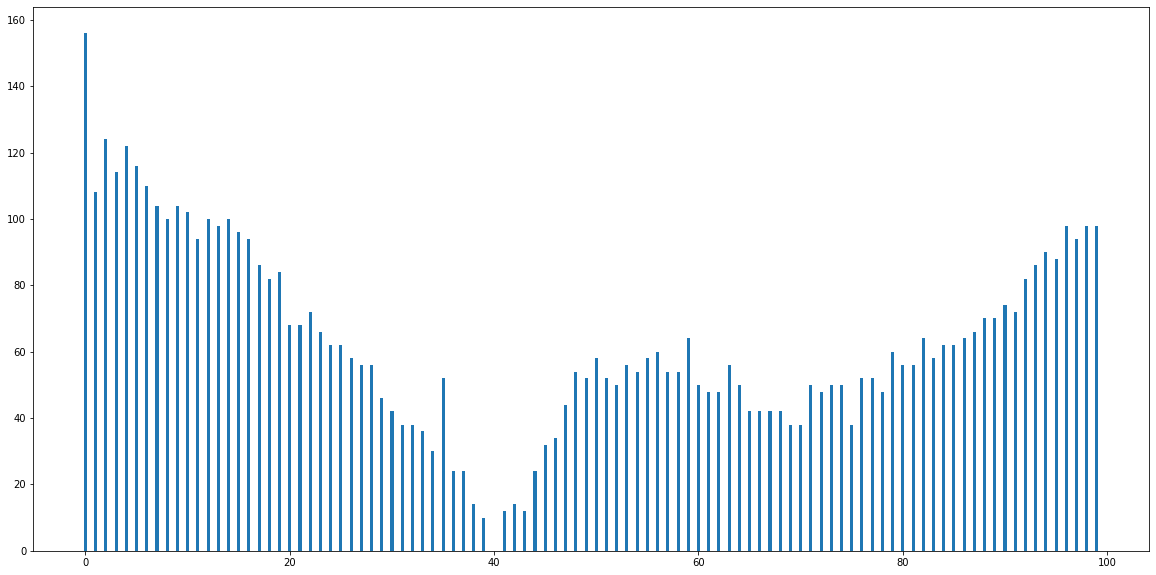

In [60]:
index = 40
plt.figure(figsize=(20,10))
plt.bar(range(len(best_dist_a[index])), best_dist_a[index], 0.3, align='center')
plt.show()

Goal(s)
* win some percentage of the train/test set
* beat the lin prog agent

## Linear Prog GA results

In [160]:
tempa1, tempb1, tempc1, tempd1 = ga.evolve(a_strat_init, b_strat_init, 1, temp_noise, mutate_func=ga.mutate_half, mutation_count=1)

In [161]:
tempc1[:5]

[[0, 0, 6, 10, 1, 22, 28, 31, 1, 1],
 [0, 0, 6, 8, 3, 22, 28, 31, 1, 1],
 [0, 0, 1, 11, 11, 16, 26, 31, 2, 2],
 [1, 0, 1, 11, 11, 15, 26, 31, 2, 2],
 [1, 8, 2, 2, 13, 18, 20, 32, 2, 2]]

In [162]:
tempa, tempb, tempc, tempd = ga.evolve(a_strat_init, b_strat_init, 1, temp_noise, mutate_func=ga.mutate_half, mutation_count=10)

In [163]:
tempc[:5]

[[0, 0, 6, 10, 1, 22, 28, 31, 1, 1],
 [3, 0, 8, 7, 1, 24, 28, 27, 0, 2],
 [0, 0, 1, 11, 11, 16, 26, 31, 2, 2],
 [0, 1, 7, 2, 14, 14, 22, 31, 2, 7],
 [1, 8, 2, 2, 13, 18, 20, 32, 2, 2]]

### half

In [111]:
half_agent_a, half_agent_b = au.make_nash_agents(best_a, best_b)

In [112]:
lin_prog_agent_a, lin_prog_agent_b = au.make_nash_agents(a_strat_init, b_strat_init)

In [113]:
agent_a, agent_b = Agent(best_a), Agent(best_b)

In [174]:
random.seed(0)
generations = 100
trials = int(1e4)
sample_size = 100
temp_noise = bu.generate_noise_arrays(1)

a_strat_init = random.sample(train_list, sample_size)
b_strat_init = random.sample(train_list, sample_size)

half_agents_a = []
half_agents_b = []

std_agents_a = []
std_agents_b = []

index = list(range(1, 51, 5))
for count in index:
    print(count)
    temp_a_strats, temp_b_strats = a_strat_init, b_strat_init
    best_a, best_b = [], []
    for i in range(generations):
        temp_a_fittest, temp_b_fittest, temp_a_strats, temp_b_strats = ga.evolve(temp_a_strats, temp_b_strats, 1, temp_noise, mutate_func=ga.mutate_half, mutation_count=count)
        best_a.append(temp_a_fittest[0][0])
        best_b.append(temp_b_fittest[0][0])
        
    x, y = au.make_nash_agents(best_a, best_b)
    half_agents_a.append(x)
    half_agents_b.append(y)
    std_agents_a.append(Agent(best_a))
    std_agents_b.append(Agent(best_b))

1
6
11
16
21
26
31
36
41
46


In [165]:
len(half_agents_a), len(half_agents_b), len(std_agents_a), len(std_agents_b)

(10, 10)

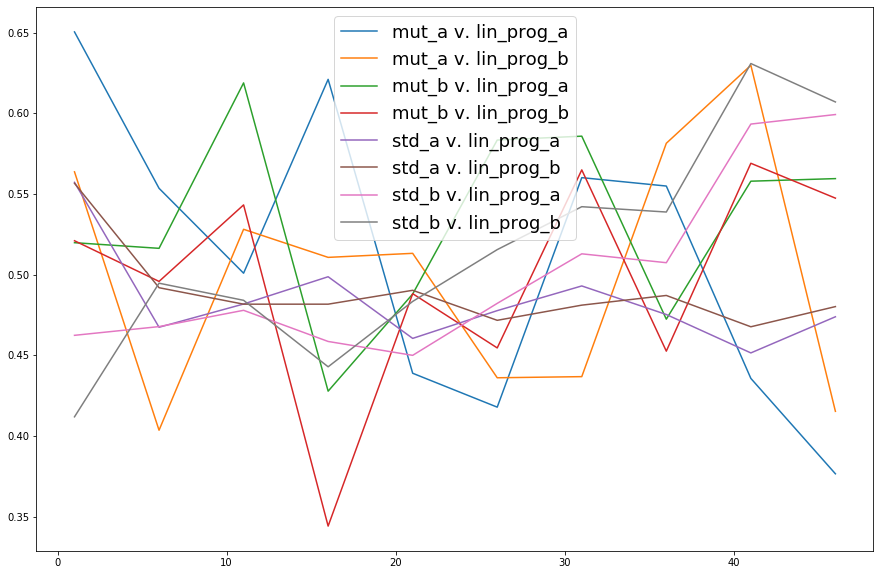

In [176]:
results = {}
results['mut_a v. lin_prog_a'] = []
results['mut_a v. lin_prog_b'] = []
results['mut_b v. lin_prog_a'] = []
results['mut_b v. lin_prog_b'] = []
results['std_a v. lin_prog_a'] = []
results['std_a v. lin_prog_b'] = []
results['std_b v. lin_prog_a'] = []
results['std_b v. lin_prog_b'] = []

for agent in half_agents_a:
    results['mut_a v. lin_prog_a'].append(au.play_game(agent, lin_prog_agent_a, trials=trials))
    results['mut_a v. lin_prog_b'].append(au.play_game(agent, lin_prog_agent_b, trials=trials))

for agent in half_agents_b:
    results['mut_b v. lin_prog_a'].append(au.play_game(agent, lin_prog_agent_a, trials=trials))
    results['mut_b v. lin_prog_b'].append(au.play_game(agent, lin_prog_agent_b, trials=trials))
    
for agent in std_agents_a:
    results['std_a v. lin_prog_a'].append(au.play_game(agent, lin_prog_agent_a, trials=trials))
    results['std_a v. lin_prog_b'].append(au.play_game(agent, lin_prog_agent_b, trials=trials))

for agent in std_agents_b:
    results['std_b v. lin_prog_a'].append(au.play_game(agent, lin_prog_agent_a, trials=trials))
    results['std_b v. lin_prog_b'].append(au.play_game(agent, lin_prog_agent_b, trials=trials))

plt.figure(figsize=(15, 10))
for key, value in results.items():
    plt.plot(index, value, label=key)
# plt.title("Linear Programming Agent on Training Data across input size", fontsize=20)
# plt.xlabel("Sample Size", fontsize=15)
# plt.ylabel("Win Percentage", fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.legend(prop={'size':18})
plt.show()

In [177]:
random.seed(0)
generations = 100
trials = int(1e4)
sample_size = 100
temp_noise = bu.generate_noise_arrays(1)

a_strat_init = random.sample(train_list, sample_size)
b_strat_init = random.sample(train_list, sample_size)

half_agents_a = []
half_agents_b = []

std_agents_a = []
std_agents_b = []

index = list(range(1, 51, 5))
for count in index:
    print(count)
    temp_a_strats, temp_b_strats = a_strat_init, b_strat_init
    best_a, best_b = [], []
    for i in range(generations):
        temp_a_fittest, temp_b_fittest, temp_a_strats, temp_b_strats = ga.evolve(temp_a_strats, temp_b_strats, 1, temp_noise, mutate_func=ga.mutate_top, mutation_count=count)
        best_a.append(temp_a_fittest[0][0])
        best_b.append(temp_b_fittest[0][0])
        
    x, y = au.make_nash_agents(best_a, best_b)
    half_agents_a.append(x)
    half_agents_b.append(y)
    std_agents_a.append(Agent(best_a))
    std_agents_b.append(Agent(best_b))

1
6
11
16
21
26
31
36
41
46


In [180]:
half_agents_a[0].play()

array([[ 0,  0, 12,  2,  0,  5, 18, 19, 10, 34],
       [ 0,  1, 12,  1,  1,  4, 16, 20, 10, 35],
       [ 0,  0, 12,  2,  0,  5, 18, 19, 10, 34],
       [ 0,  0, 12,  2,  0,  5, 18, 19, 10, 34],
       [ 0,  0, 12,  2,  0,  5, 18, 19, 10, 34],
       [ 0,  1, 12,  1,  1,  4, 16, 20, 10, 35],
       [ 0,  0, 12,  2,  0,  5, 18, 19, 10, 34],
       [ 0,  0, 12,  1,  1,  5, 17, 10,  9, 45],
       [ 0,  0, 12,  1,  1,  5, 17, 10,  9, 45],
       [ 0,  0, 12,  2,  0,  5, 18, 19, 10, 34],
       [ 0,  0, 12,  1,  1,  5, 17, 10,  9, 45],
       [ 0,  0, 12,  2,  0,  5, 18, 19, 10, 34],
       [ 0,  0, 12,  2,  0,  5, 18, 19, 10, 34],
       [ 0,  0, 12,  1,  1,  5, 17, 10,  9, 45],
       [ 2,  8,  3,  0, 19, 19, 23, 22,  1,  3],
       [ 2,  8,  3,  0, 19, 19, 23, 22,  1,  3],
       [ 2,  8,  3,  0, 19, 19, 23, 22,  1,  3],
       [ 0,  0, 12,  1,  1,  5, 17, 10,  9, 45],
       [ 0,  0, 12,  1,  1,  5, 17, 10,  9, 45],
       [ 0,  0, 12,  1,  1,  5, 17, 10,  9, 45],
       [ 0,  0, 12, 

In [178]:
len(half_agents_a), len(half_agents_b), len(std_agents_a), len(std_agents_b)

(10, 10, 10, 10)

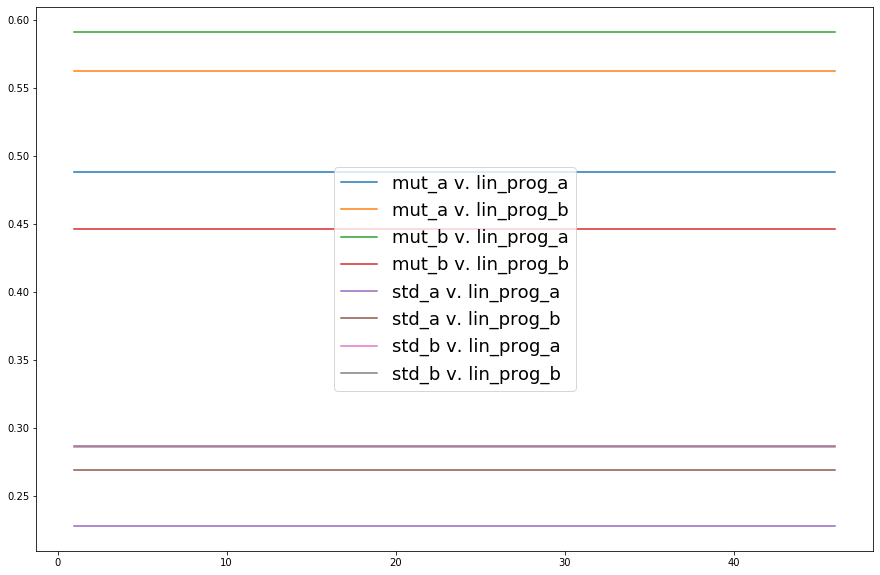

In [179]:
results = {}
results['mut_a v. lin_prog_a'] = []
results['mut_a v. lin_prog_b'] = []
results['mut_b v. lin_prog_a'] = []
results['mut_b v. lin_prog_b'] = []
results['std_a v. lin_prog_a'] = []
results['std_a v. lin_prog_b'] = []
results['std_b v. lin_prog_a'] = []
results['std_b v. lin_prog_b'] = []

for agent in half_agents_a:
    results['mut_a v. lin_prog_a'].append(au.play_game(agent, lin_prog_agent_a, trials=trials))
    results['mut_a v. lin_prog_b'].append(au.play_game(agent, lin_prog_agent_b, trials=trials))

for agent in half_agents_b:
    results['mut_b v. lin_prog_a'].append(au.play_game(agent, lin_prog_agent_a, trials=trials))
    results['mut_b v. lin_prog_b'].append(au.play_game(agent, lin_prog_agent_b, trials=trials))
    
for agent in std_agents_a:
    results['std_a v. lin_prog_a'].append(au.play_game(agent, lin_prog_agent_a, trials=trials))
    results['std_a v. lin_prog_b'].append(au.play_game(agent, lin_prog_agent_b, trials=trials))

for agent in std_agents_b:
    results['std_b v. lin_prog_a'].append(au.play_game(agent, lin_prog_agent_a, trials=trials))
    results['std_b v. lin_prog_b'].append(au.play_game(agent, lin_prog_agent_b, trials=trials))

plt.figure(figsize=(15, 10))
for key, value in results.items():
    plt.plot(index, value, label=key)
# plt.title("Linear Programming Agent on Training Data across input size", fontsize=20)
# plt.xlabel("Sample Size", fontsize=15)
# plt.ylabel("Win Percentage", fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.legend(prop={'size':18})
plt.show()

#### test

In [114]:
au.play_game(half_agent_a, half_agent_b, trials=trials)

0.7182999999999999

In [115]:
au.play_game(agent_a, lin_prog_agent_a, trials=trials)

0.5094

In [116]:
au.play_game(agent_a, lin_prog_agent_b, trials=trials)

0.519

In [117]:
au.play_game(agent_b, lin_prog_agent_a, trials=trials)

0.4474

In [118]:
au.play_game(agent_b, lin_prog_agent_b, trials=trials)

0.4141

In [119]:
au.play_game(half_agent_a, agent_b, trials=trials)

0.483

In [120]:
au.play_game(half_agent_b, agent_a, trials=trials)

0.5708

In [121]:
au.play_game(half_agent_a, lin_prog_agent_a, trials=trials)

0.4395

In [122]:
au.play_game(half_agent_a, lin_prog_agent_b, trials=trials)

0.6476

In [123]:
au.play_game(half_agent_b, lin_prog_agent_a, trials=trials)

0.4683

In [124]:
au.play_game(half_agent_b, lin_prog_agent_b, trials=trials)

0.41400000000000003

In [125]:
au.play_game(half_agent_a, train_list, trials=len(train_list))

0.49147516679021497

In [126]:
au.play_game(half_agent_b, train_list, trials=len(train_list))

0.4507042253521127

In [127]:
au.play_game(half_agent_a, test_list, trials=len(test_list))

0.4854063762909744

In [128]:
au.play_game(half_agent_b, test_list, trials=len(test_list))

0.47238437359676694

## Mixed Strategies